In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
J = scipy.io.loadmat('data/pagerank_adj.mat')['J']
A = J/J.sum(axis=0)

In [3]:
np.allclose(A.sum(axis=0), 1)

True

In [4]:
def power_iteration(A, x, num_iters=10):
    x = [x]
    y = []
    l = []
    for k in range(num_iters):
        y.append(A.dot(x[-1]))
        x.append(y[-1]/np.linalg.norm(y[-1]))
        l.append(x[-1].conj().T.dot(A).dot(x[-1]))
    return x[1:], y, l

In [5]:
x0 = np.ones(A.shape[0])# + 1j*np.random.rand(A.shape[0]) # Random complex x vector
#x0 = x0 / np.linalg.norm(x0)
xs, ys, ls = power_iteration(A, x0)

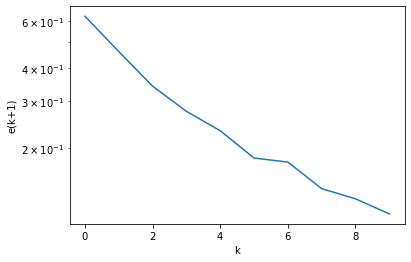

In [6]:
error = [np.linalg.norm(A.dot(x) - x) for x in xs]
plt.ylabel('e(k+1)')
plt.xlabel('k')
plt.yscale('log')
plt.plot(error)
plt.show()

In [7]:
def shift_invert_power_iteration(A, x, sigma, num_iters=10):
    x = [x]
    y = []
    l = []
    A_inv = np.linalg.inv(A - sigma * np.eye(A.shape[0]))
    for k in range(num_iters):
        y.append(A_inv.dot(x[-1]))
        x.append(y[-1]/np.linalg.norm(y[-1]))
        l.append(x[-1].conj().T.dot(A).dot(x[-1]))
    return x[1:], y, l

In [8]:
def rayleigh_quotient_iteration(A, y, num_iters=10):
    x = [y]
    y = []
    
    for i in range(num_iters):
        sigma = x[-1].conj().T.dot(A).dot(x[-1]) / x[-1].conj().dot(x[-1]) if i >= 2 else 0.99
        y.append(np.linalg.solve(A - sigma * np.eye(A.shape[0]), x[-1]))
        x.append(y[-1]/np.linalg.norm(y[-1]))

    return x[1:], y

In [9]:
si_xs, si_ys, si_ls = shift_invert_power_iteration(A, x0, 0.99)
rq_xs, rq_ys = rayleigh_quotient_iteration(A, x0, num_iters=8)

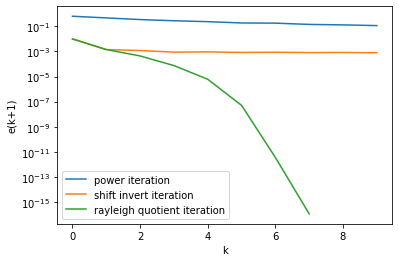

In [10]:
p_error = [np.linalg.norm(A.dot(x) - x) for x in xs]
si_error = [np.linalg.norm(A.dot(x) - x) for x in si_xs]
rq_error = [np.linalg.norm(A.dot(x) - x) for x in rq_xs]

plt.ylabel('e(k+1)')
plt.xlabel('k')
plt.yscale('log')
plt.plot(p_error, label='power iteration')
plt.plot(si_error, label='shift invert iteration')
plt.plot(rq_error, label='rayleigh quotient iteration')
plt.legend()
plt.show()

In [11]:
pagerank = (rq_xs[-1]).argsort()

In [12]:
pagerank[:5]

array([ 0, 47,  4,  9, 22])

In [13]:
pagerank[-5:]

array([929, 984, 985, 986, 423])

array([0.        , 0.        , 0.        , ..., 0.30726791, 0.32955532,
       0.43936694])

True